# EN3160 Assignment 1

### Q1. 
![Question 01](q/q1.png)


(810, 720)


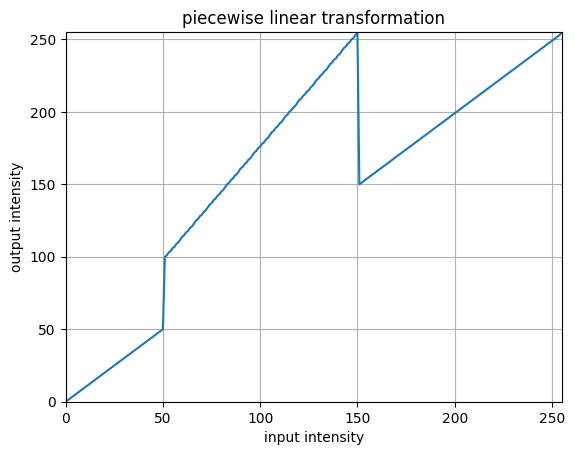

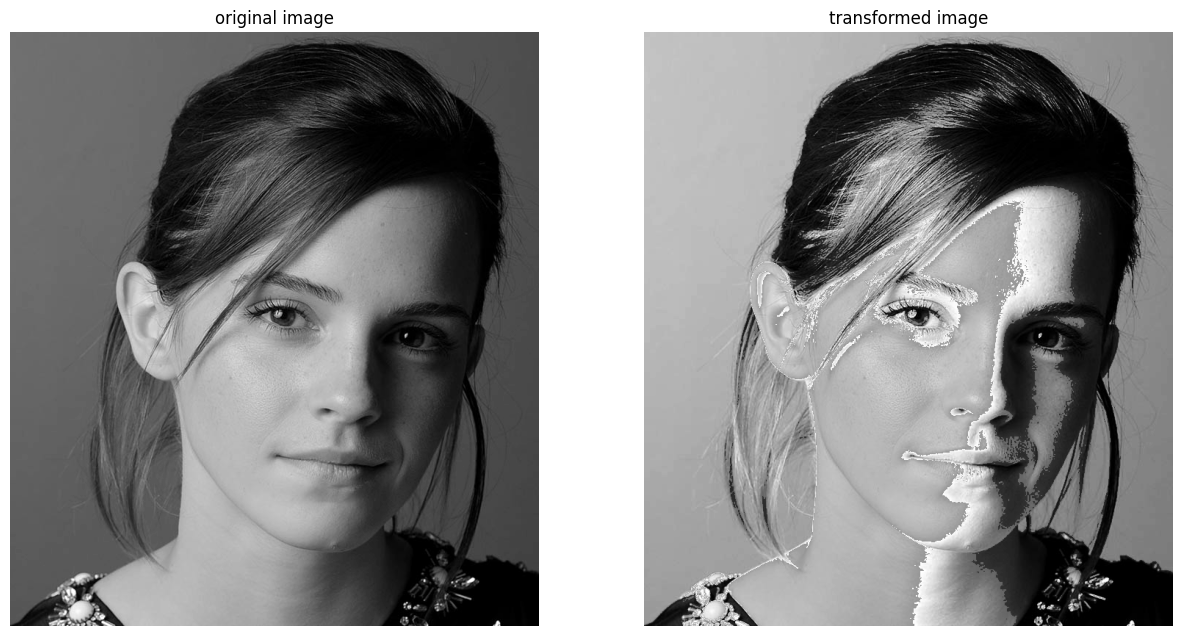

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# read the image
img = cv.imread(r"a1images/a1images/emma.jpg" , cv.IMREAD_GRAYSCALE )

assert img is not None, "file could not be read, check with os.path.exists()"
print(img.shape)
#create peacewise  linear transformation
t1 = np.linspace(0 ,50 , 51 ,endpoint=True , dtype = np.uint8)
t2 = np.linspace(100 , 255 , 100 , endpoint=True , dtype = np.uint8)
t3 = np.linspace(150 , 255 , 105 , endpoint=True , dtype = np.uint8)

# implement the intensity transformation 
transformation = np.concatenate((t1 , t2 , t3))

#apply the transformation
img_transformed = cv.LUT(img , transformation)

#plot the transformation
plt.plot(transformation)
plt.axis([0 , 255 , 0 , 255])
plt.title("piecewise linear transformation")
plt.xlabel("input intensity")
plt.ylabel("output intensity")
plt.grid(True)
plt.show()

#plot the original and transformed images
fig , ax = plt.subplots(1 , 2 , figsize=(15,10))
ax[0].imshow(img , cmap="gray")
ax[0].set_title("original image")
ax[0].axis("off")
ax[1].imshow(img_transformed , cmap="gray")
ax[1].set_title("transformed image")
ax[1].axis("off")
plt.show()



### Q2.
![Question 01](q/q2.png)


#### a. white matter

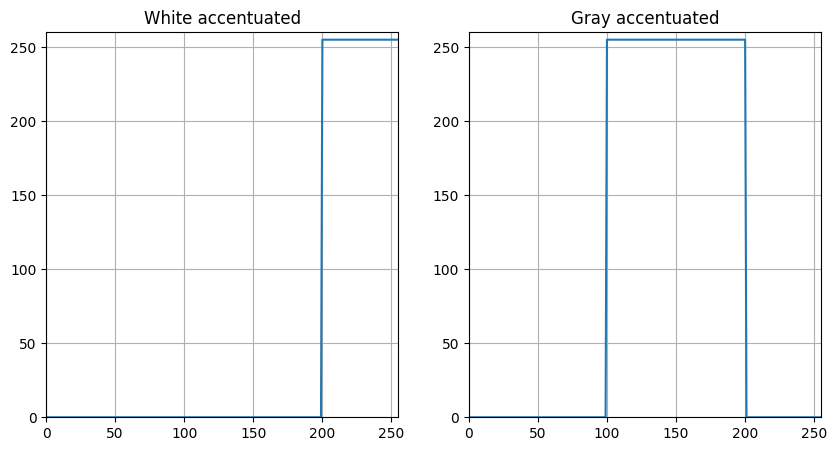

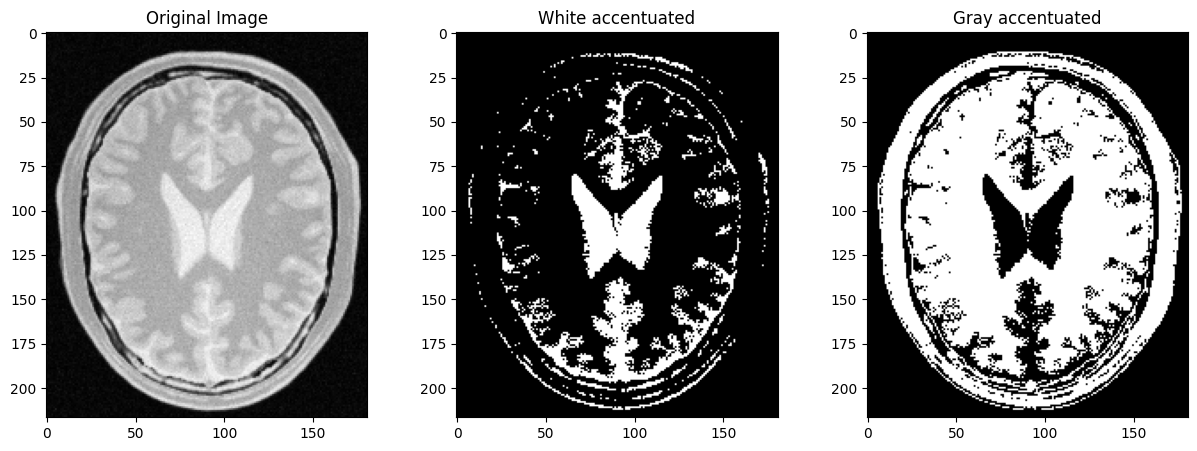

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Defining the transformation function for white
def white():
    result = np.zeros(256, dtype=np.uint8)  # Create an array of zeros with size 256
    for i in range(256):
        if i < 200 :
            result[i] = 0
        else:
            result[i] = 255
    return result

def gray():
    result = np.zeros(256, dtype=np.uint8)  # Create an array of zeros with size 256
    for i in range(256):
        if i < 100 or i > 200:
            result[i] = 0  # Set values below 100 and above 200 to 0
        else:
            result[i] = 255  # Set values from 100 to 200 to 150
    return result

# Call the transformation functions
white_accentuated = white()
gray_accentuated = gray()

#plot the transformation functions
fig , ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(white_accentuated)
ax[0].set_title("White accentuated")
ax[0].axis([0 ,255 ,0 ,260])
ax[0].grid()
ax[1].plot(gray_accentuated)
ax[1].set_title("Gray accentuated")
ax[1].axis([0 ,255 ,0 ,260])
ax[1].grid()
plt.show()

# Read the image
img = cv.imread(r"a1images/a1images/brain_proton_density_slice.png" , cv.IMREAD_GRAYSCALE )

assert img is not None, "file could not be read, check with os.path.exists()"

# Apply the transformation functions
white_img = cv.LUT(img, white_accentuated)
gray_img = cv.LUT(img, gray_accentuated)
# Display the images
fig , ax  = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(white_img, cmap='gray')
ax[1].set_title("White accentuated")
ax[2].imshow(gray_img, cmap='gray')
ax[2].set_title("Gray accentuated")
plt.show()





### Q3.
![Question 01](q/q3.png)

#### a. Apply the gamma correction



The **L\*a\*b\*** color space, also known as the **CIELAB** color space, represents color in a way that separates the **lightness** from the **color components**. It is widely used in image processing and computer vision for color adjustments and corrections.

### L\*, a\*, b\* Components

### 1. L\* (Lightness)
- **L\*** represents the lightness of the color, ranging from **0 (black)** to **100 (white)**.
- It defines how **dark** or **light** a color is, independent of the hue and saturation.
- Higher values of **L\*** represent lighter colors, while lower values represent darker colors.

### 2. a\* (Green-Red)
- **a\*** represents the color axis between **green** and **red**.
- **Negative** values of **a\*** indicate a greenish color, while **positive** values indicate a reddish color.
- **a\*** helps to distinguish colors based on their green-to-red balance.

### 3. b\* (Blue-Yellow)
- **b\*** represents the color axis between **blue** and **yellow**.
- **Negative** values of **b\*** indicate a blueish color, while **positive** values indicate a yellowish color.
- **b\*** helps to distinguish colors based on their blue-to-yellow balance.

---



When applying **gamma correction** to the **L\*** plane (Lightness), it adjusts the **brightness** or **contrast** of the image without altering the **color information** from the **a\*** and **b\*** planes.

- **Gamma correction** is used to correct the non-linearity in the way light is captured or displayed. It is often applied to the **L\*** channel to make an image appear more natural to human vision.
- Gamma correction enhances the brightness or contrast while maintaining the original colors of the image.

### The mathematical equation for gamma correction is:



$$
I_{\text{output}} = 255 \times \left( \frac{I_{\text{input}}}{255} \right)^{\gamma}
$$

Where:
- $I_{\text{input}}$ is the input pixel intensity (ranging from 0 to 255).
- $I_{\text{output}}$ is the gamma-corrected output pixel intensity (ranging from 0 to 255).
- $\gamma$ is the gamma correction factor (a scalar value).


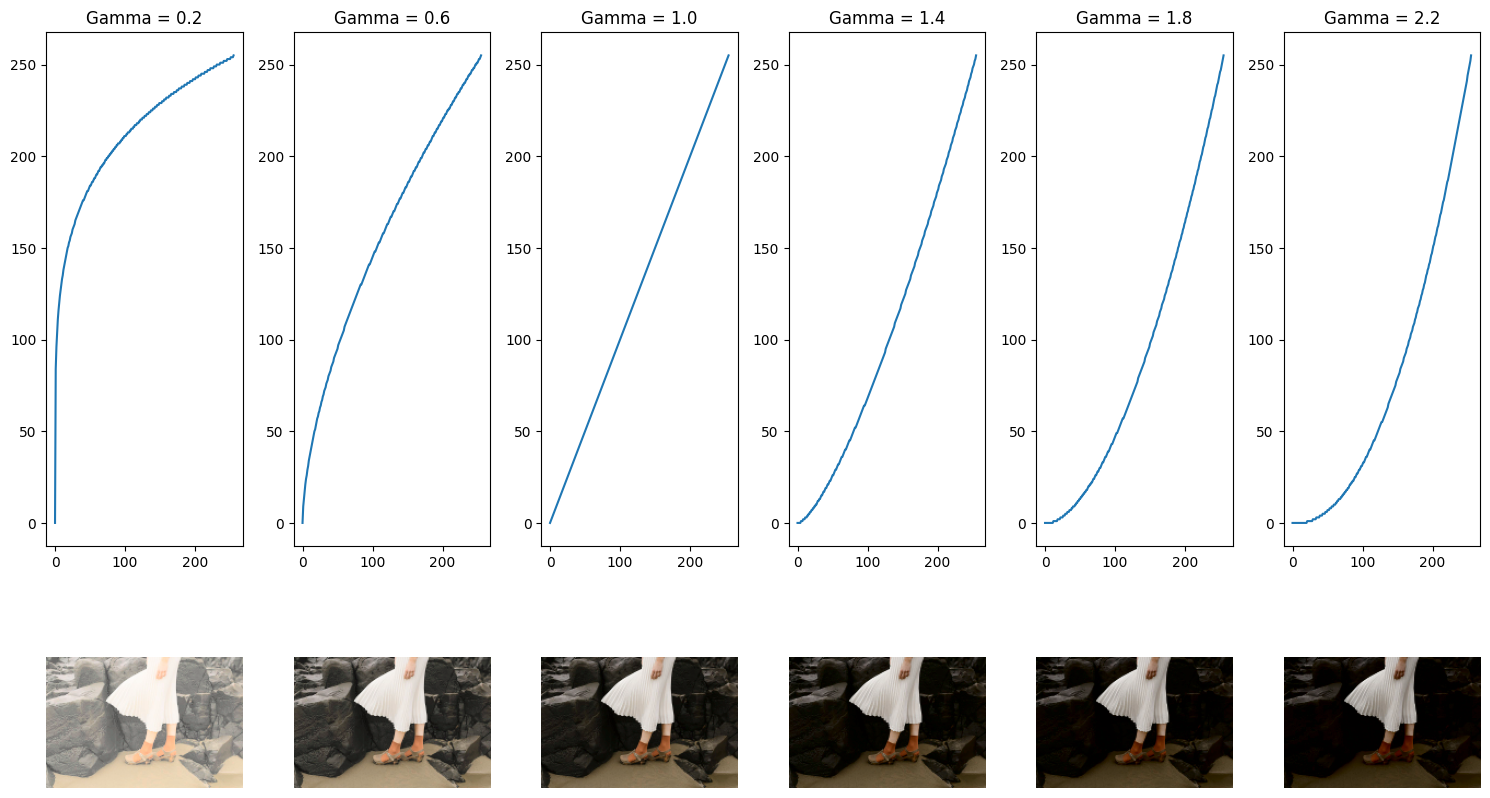

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert to RGB
img = cv.imread(r"a1images/a1images/highlights_and_shadows.jpg" , cv.COLOR_BGR2Lab)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
assert img is not None, "file could not be read, check with os.path.exists()"

# Convert image to Lab color space
img_converted = cv.cvtColor(img, cv.COLOR_RGB2Lab)

# Split the Lab image into L*, a*, and b* channels
L, a, b = cv.split(img_converted)

# Define gamma values
gamma_values = np.array([0.2, 0.6, 1, 1.4, 1.8, 2.2])

# Prepare subplots
fig, ax = plt.subplots(2, 6, figsize=(15, 10))

for i, gamma in enumerate(gamma_values):
    # Create gamma correction lookup table
    t = np.array([(p / 255) ** gamma * 255 for p in range(256)]).astype(np.uint8)
    L_gamma = cv.LUT(L, t)
    img_gamma_lab = cv.merge([L_gamma, a, b])   
    img_gamma_rgb = cv.cvtColor(img_gamma_lab, cv.COLOR_Lab2RGB)

    # Plot the gamma curve
    ax[0, i].plot(t)
    ax[0, i].set_title(f"Gamma = {gamma}")

    # Display the gamma-corrected image
    ax[1, i].imshow(img_gamma_rgb)
    ax[1, i].axis('off')

# Show the plots
plt.tight_layout()
plt.show()



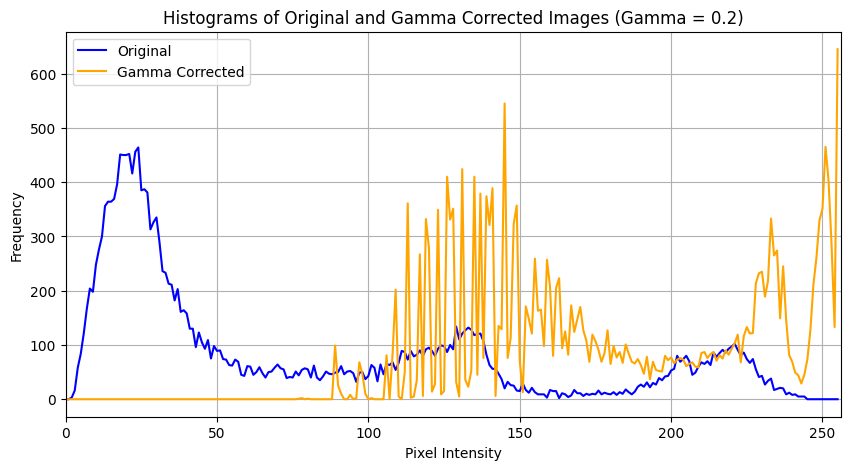

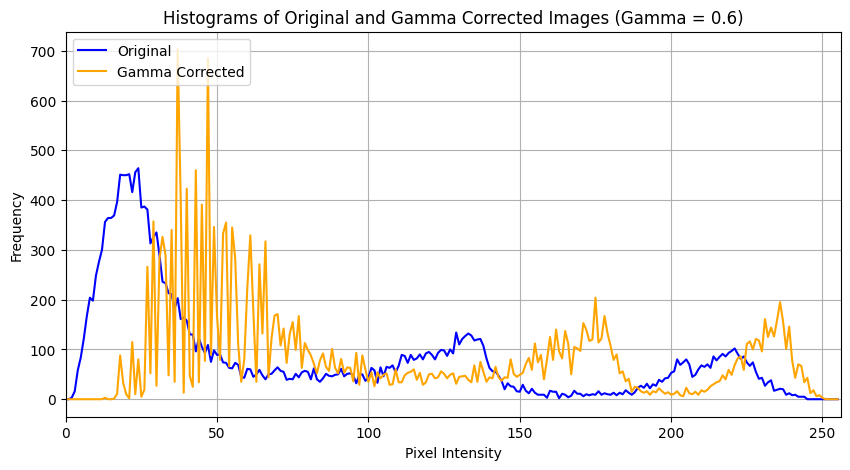

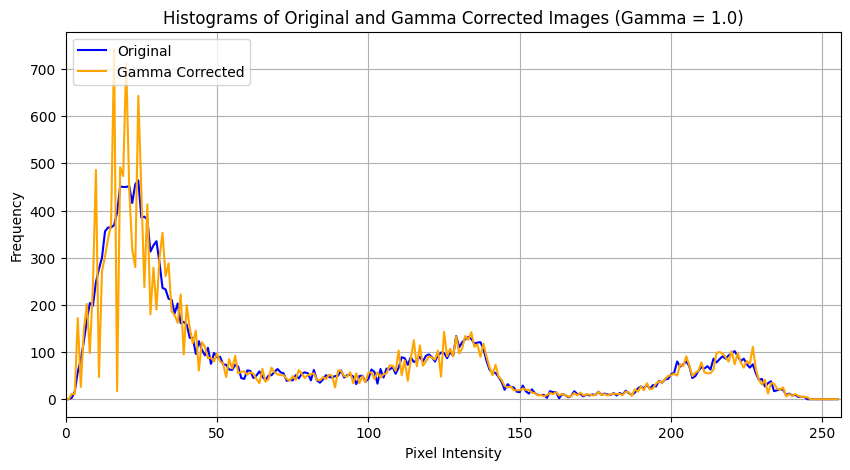

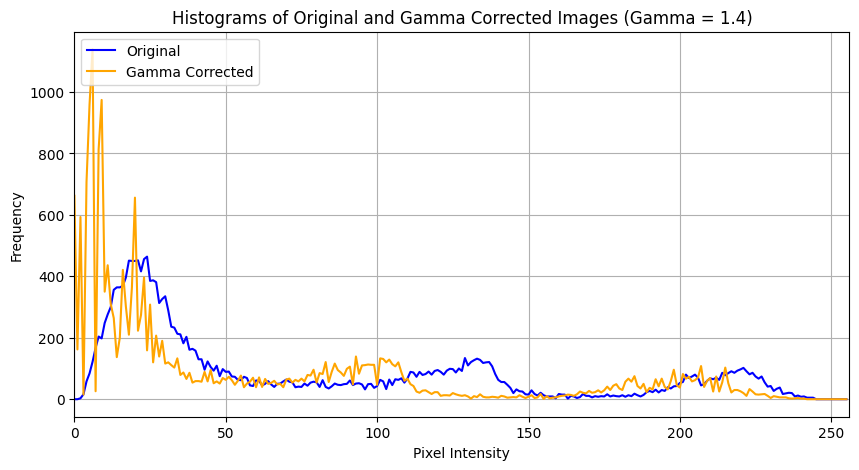

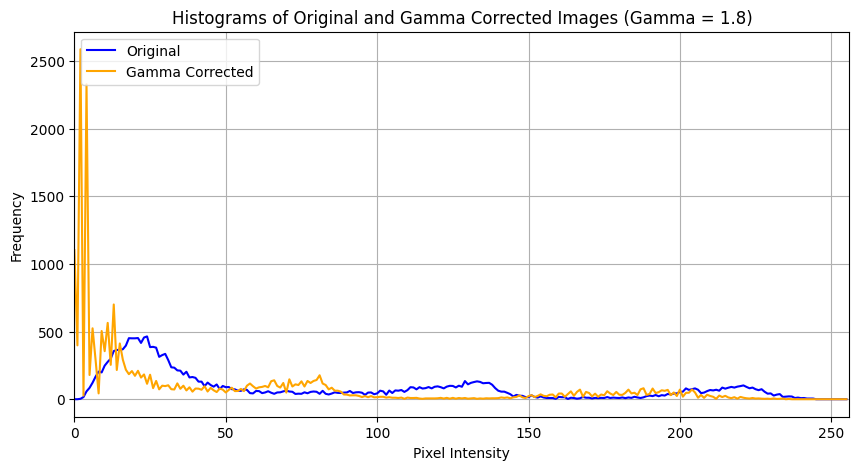

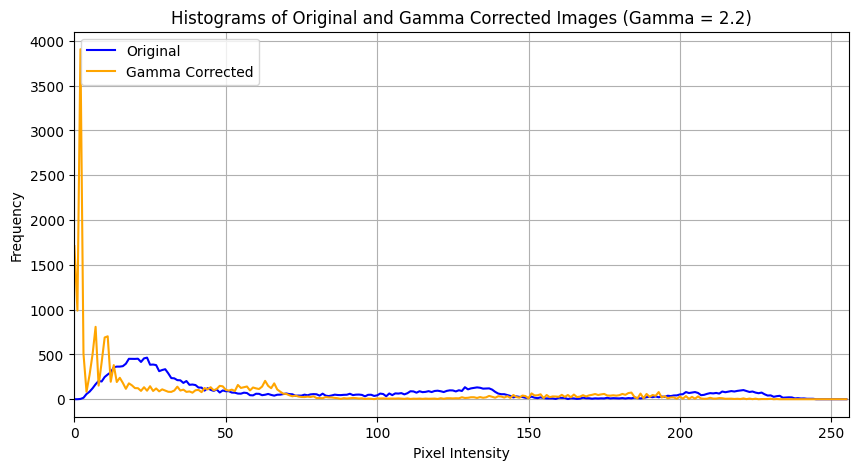

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert to RGB
img = cv.imread(r"a1images/a1images/highlights_and_shadows.jpg" , cv.COLOR_BGR2Lab)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
assert img is not None, "file could not be read, check with os.path.exists()"

# Convert image to Lab color space
img_converted = cv.cvtColor(img, cv.COLOR_RGB2Lab)
hist = cv.calcHist([img], [0], None, [256], [0, 256])

# Split the Lab image into L*, a*, and b* channels
L, a, b = cv.split(img_converted)

# Define gamma values
gamma_values = np.array([0.2, 0.6, 1, 1.4, 1.8, 2.2])


for i, gamma in enumerate(gamma_values):
    # Create gamma correction lookup table
    t = np.array([(p / 255) ** gamma * 255 for p in range(256)]).astype(np.uint8)
    L_gamma = cv.LUT(L, t)
    img_gamma_lab = cv.merge([L_gamma, a, b])   
    img_gamma_rgb = cv.cvtColor(img_gamma_lab, cv.COLOR_Lab2RGB)
    hist_gamma = cv.calcHist([img_gamma_rgb], [0], None, [256], [0, 256])


    
    # Plot histograms
    plt.figure(figsize=(10, 5))
    plt.plot(hist, label='Original', color='blue')
    plt.plot(hist_gamma, label='Gamma Corrected', color='orange')
    plt.xlim([0, 256])
    plt.title('Histograms of Original and Gamma Corrected Images' + f' (Gamma = {gamma})')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    plt.grid(True)
    


# Show the plots
plt.show()

## Gamma Correction and Its Effects on Image Brightness



$$
I_{\text{output}} = 255 \times \left( \frac{I_{\text{input}}}{255} \right)^{\gamma}
$$


#### Effects of Different Gamma Values:

1. **Gamma Values Less Than 1 ($\gamma < 1$)**:
   - When the gamma value is less than 1, the output intensity increases for lower input intensities. This results in a brighter image because more pixel values are mapped to higher intensity values.
   - As a result, the histogram of the image will be distributed towards the higher pixel values, indicating that more pixels are present in the brighter areas of the image.

2. **Gamma Values Greater Than 1 ($\gamma > 1$)**:
   - When the gamma value is greater than 1, the output intensity decreases for lower input intensities. This leads to a darker image since the lower pixel values are compressed more towards the lower end of the intensity scale.
   - Consequently, the histogram will show a concentration of pixel values towards the lower pixel values, reflecting that more pixels are present in the darker regions of the image.




### Q4. 
![Question 01](q/q4.png)

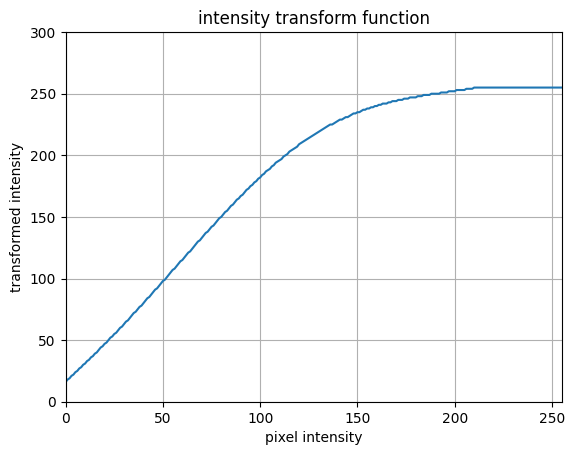

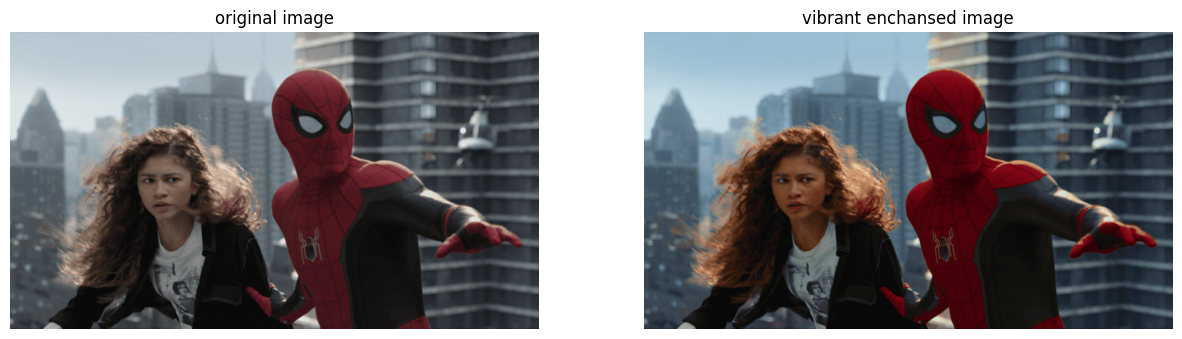

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"a1images/a1images/spider.png" , )
assert img is not None, "file could not be read, check with os.path.exists()"
 
#splite the image into hue, saturation and value
splited_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
H , S , V = cv.split(splited_img)


#intensity transform function
# Define the intensity transform function
a = 0.7
sigma = 70
t = np.array([p + a * 128 * np.exp(-(p - 128)**2 / (2 * sigma**2)) for p in range(256)])

# Clip values to make sure they are in the range [0, 255]
t_clipped = np.clip(t, 0, 255).astype(np.uint8)

#apply the intensity transform function to the saturate channel
s_transformed = cv.LUT(S, t_clipped)


#merge the channels
result = cv.merge([H, s_transformed, V])
result = cv.cvtColor(result, cv.COLOR_HSV2RGB)

#plot the transformation
plt.plot(t_clipped)
plt.xlabel("pixel intensity")
plt.ylabel("transformed intensity")
plt.title("intensity transform function")
plt.axis([0, 255, 0, 300])
plt.grid()
plt.show()


#show the image
fig , ax = plt.subplots(1, 2 , figsize=(15, 10))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("original image")
ax[0].axis("off")
ax[1].imshow(result)
ax[1].set_title("vibrant enchansed image")
ax[1].axis("off")



plt.show()





### Q5.  Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the histograms before and after equalization.

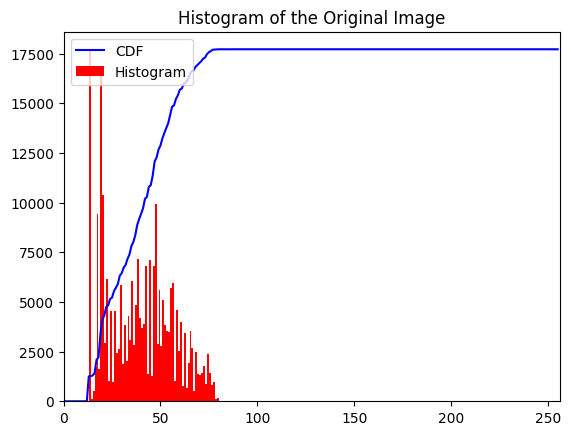

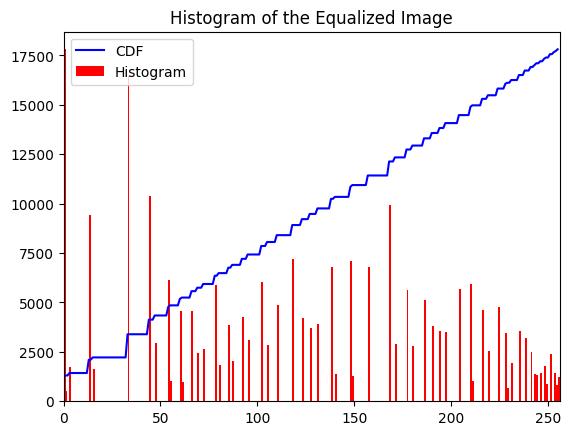

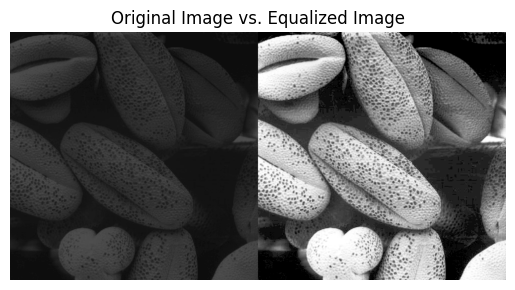

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
img = cv.imread(r"a1images/a1images/shells.tif", cv.IMREAD_GRAYSCALE)

# Calculate histogram and cumulative distribution function (CDF) of the original image
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# Plot CDF and histogram of the original image
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(['CDF', 'Histogram'], loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()

# Perform histogram equalization
equ = cv.equalizeHist(img)

# Calculate histogram and CDF of the equalized image
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# Plot CDF and histogram of the equalized image
plt.plot(cdf_normalized, color='b')
plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(['CDF', 'Histogram'], loc='upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

# Combine original and equalized images for visualization
res = np.hstack((img, equ))

# Display combined image
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.title('Original Image vs. Equalized Image')
plt.show()

# Histogram Equalization on Foreground of an Image

In this question, we will apply histogram equalization only to the foreground of an image to produce an image with a histogram-equalized foreground.



1. **Open the image, split it into hue, saturation, and values, and display these planes in grayscale.**
   
2. **Select the appropriate plane to threshold and extract the foreground mask.**
   
   - A mask is a binary image.
   
3. **Obtain the foreground only using `cv.bitwise_and` and compute its histogram.**
   
4. **Obtain the cumulative sum of the histogram using `np.cumsum`.**

5. **Use the formulas in slides to histogram-equalize the foreground.**

6. **Extract the background and add it with the histogram equalized foreground.**
   
7. **Show the hue, saturation, and value planes, the mask, the original image, and the result with the histogram-equalized foreground.**


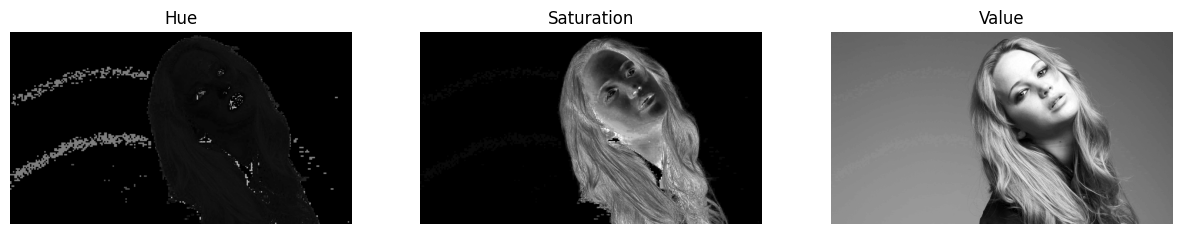

In [54]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"a1images/a1images/jeniffer.jpg")
HSV_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
H , S , V = cv.split(HSV_img)

#dislay the planes in gray scale
fig , ax = plt.subplots(1,3 , figsize=(15,15))
ax[0].imshow(H, cmap='gray' , vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis('off')
ax[1].imshow(S, cmap='gray' , vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis('off')
ax[2].imshow(V, cmap='gray' , vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis('off')

plt.show()

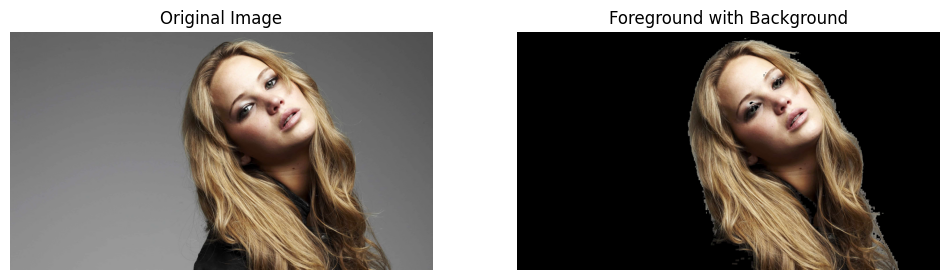

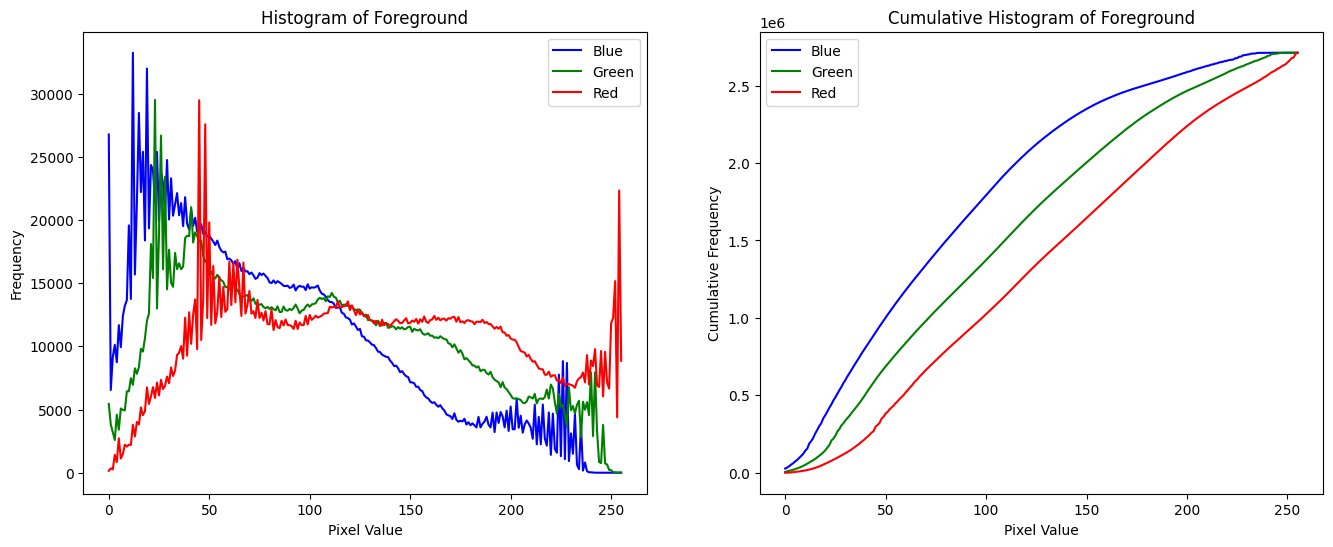

In [72]:
# Saturated plane selected to extract the foreground.
treshold = 13
_, mask = cv.threshold(S, treshold, 255, cv.THRESH_BINARY)

# Extract the foreground using bitwise_and and the mask
foreground = cv.bitwise_and(img, img, mask=mask)

foreground_hist_B = cv.calcHist([foreground], [0], mask, [256], [0, 256])
foreground_hist_G = cv.calcHist([foreground], [1], mask, [256], [0, 256])
foreground_hist_R = cv.calcHist([foreground], [2], mask, [256], [0, 256])

cumulative_hist_B = np.cumsum(foreground_hist_B)
cumulative_hist_G = np.cumsum(foreground_hist_G)
cumulative_hist_R = np.cumsum(foreground_hist_R)

# Display the original image and the result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground with Background')
ax[1].axis('off')
plt.show()

# Display the histograms and cumulative histograms 
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  

# Plot the histograms on the left subplot (ax1)
ax[0].plot(foreground_hist_B, color='blue', label='Blue')
ax[0].plot(foreground_hist_G, color='green', label='Green')
ax[0].plot(foreground_hist_R, color='red', label='Red')
ax[0].set_title('Histogram of Foreground')
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].legend()


ax[1].plot(cumulative_hist_B, color='blue', label='Blue')
ax[1].plot(cumulative_hist_G, color='green', label='Green')
ax[1].plot(cumulative_hist_R, color='red', label='Red')
ax[1].set_title('Cumulative Histogram of Foreground')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Cumulative Frequency')
ax[1].legend()

 
plt.show()




### 7. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 7

(a) Using the existing `filter2D` to Sobel filter the image.

(b) Write your own code to Sobel filter the image.

(c) Using the property 



![Question 01](q/q7.png)


carry out Sobel filtering.


#### 1. Sobel Horizontal and Vertical Filters (Convolution)

The Sobel filters (`sobel_h` and `sobel_v`) are applied to the image $I$ using a 2D convolution. Mathematically, this can be written as:

#### Horizontal Gradient ($I_x$):
$$
I_x = I * S_x
$$
Where $I$ is the input image, and $S_x$ is the horizontal Sobel filter:

$$
S_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

#### Vertical Gradient ($I_y$):
$$
I_y = I * S_y
$$
Where $S_y$ is the vertical Sobel filter:

$$
S_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

Here, the symbol `*` denotes the 2D convolution operation.

#### 2. Gradient Magnitude Calculation

After obtaining the gradients in the $x$ and $y$ directions ($I_x$ and $I_y$), the gradient magnitude is computed using the Euclidean distance formula (also known as the L2 norm):

$$
\text{Gradient Magnitude} = \sqrt{I_x^2 + I_y^2}
$$

This equation computes the magnitude of the gradient at each pixel by combining the horizontal and vertical gradient components. The result is the overall edge strength at each point in the image.


<function matplotlib.pyplot.show(close=None, block=None)>

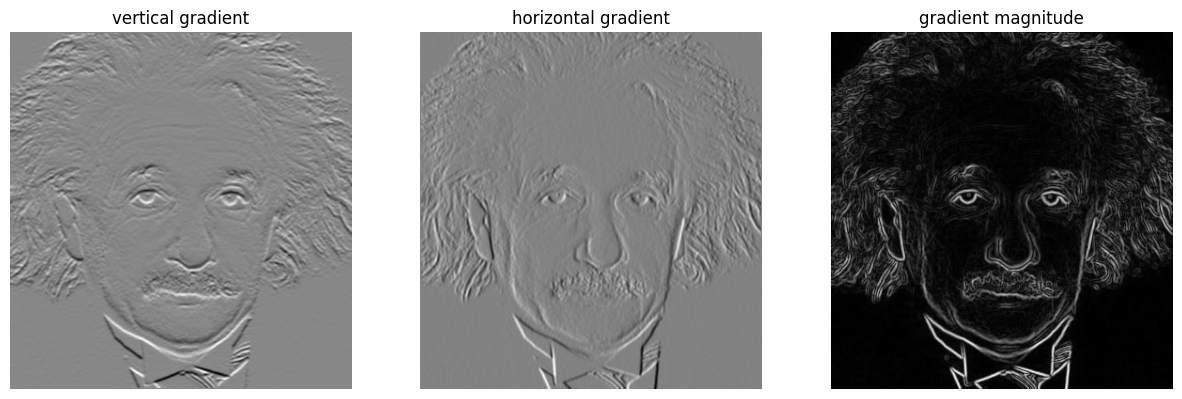

In [79]:
# a) using filter2D 

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"a1images/a1images/einstein.png", cv.IMREAD_COLOR)
assert img is not None, "file could not be read, check with os.path.exists()"

I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
I = np.float32(I)

#define sobel kernels
sobel_h = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]] , dtype = np.float32)
sobel_v = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]] , dtype = np.float32)

#apply sobel kernels
Ix = cv.filter2D(I , -1 , sobel_v)
Iy = cv.filter2D(I , -1 , sobel_h)

#calculate gradient magnitude
gradient = np.sqrt(Ix**2 + Iy**2)

#plot images
fig , ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(Ix, cmap='gray')
ax[0].set_title('vertical gradient')
ax[0].axis('off')
ax[1].imshow(Iy, cmap='gray')   
ax[1].set_title('horizontal gradient')
ax[1].axis('off')
ax[2].imshow(gradient, cmap='gray')
ax[2].set_title('gradient magnitude')
ax[2].axis('off')
plt.show



In [ ]:
# b) 